In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


# carregar arquivo .mat
mat = loadmat('in_out_SBRT2_direto.mat')

in_data_ext = mat['in_extraction']
out_data_ext = mat['out_extraction']
in_data_val = mat['in_validation']
out_data_val = mat['out_validation']


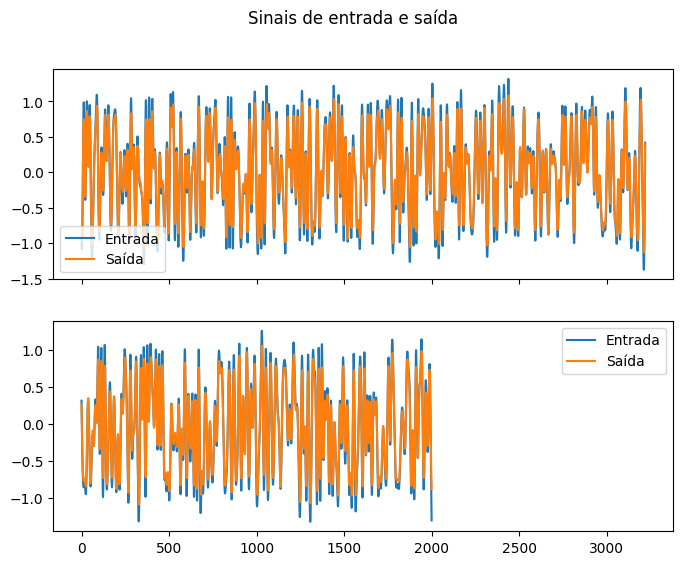

In [2]:
# plotar sinais de entrada e saída
x_ext = range(len(in_data_ext))
x_val = range(len(in_data_val))

fig, axs = plt.subplots(2, sharex=True, figsize=(8, 6))
fig.suptitle('Sinais de entrada e saída')
axs[0].plot(x_ext, np.real(in_data_ext), label='Entrada')
axs[0].plot(x_ext, np.real(out_data_ext), label='Saída')
axs[0].legend()
axs[1].plot(x_val, np.real(in_data_val), label='Entrada')
axs[1].plot(x_val, np.real(out_data_val), label='Saída')
axs[1].legend()
plt.show()

In [42]:
import numpy as np

def mp(P, M, xn):
    L = xn.shape
    XX = np.zeros((L[0] - M, P * (M+1)), dtype=np.complex128)
    for l in range(M+1, L[0]):
        for p in range(1, P+1):
            for m in range(0, M+1):
                XX[l-M-1, ((p-1)*(M+1))+m] = np.abs(xn[l-m]**(2*p-2))*(xn[l-m])
    return XX

M = 1
P = 2
XX_val = mp(P, M, in_data_val)
XX_ext = mp(P, M, in_data_ext)


In [43]:
in_data_ext.shape

(3221, 1)

In [44]:

# Coeficientes do modelo MP
coefficients, _, _, _ = np.linalg.lstsq(XX_ext, out_data_ext[M:], rcond=None)

# Saída estimada para o conjunto de dados de validação
predicted_val = XX_val @ coefficients


In [45]:
XX_ext.shape, out_data_ext.shape

((3220, 10), (3221, 1))

In [46]:
nmse = 10*np.log10(np.mean(np.abs(out_data_val[M:] - predicted_val) ** 2) / np.mean(np.abs(out_data_val[M:]) ** 2))
nmse

-23.74086487090708

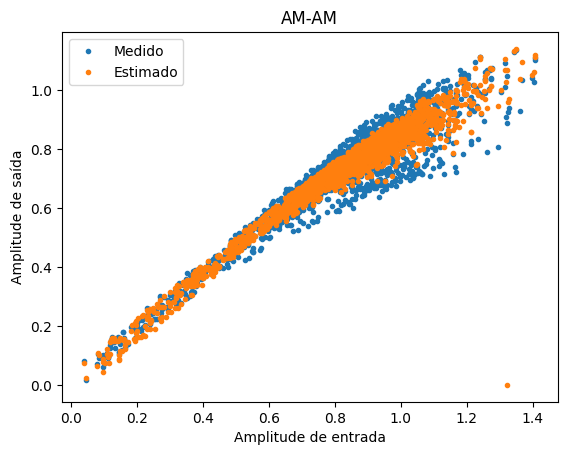

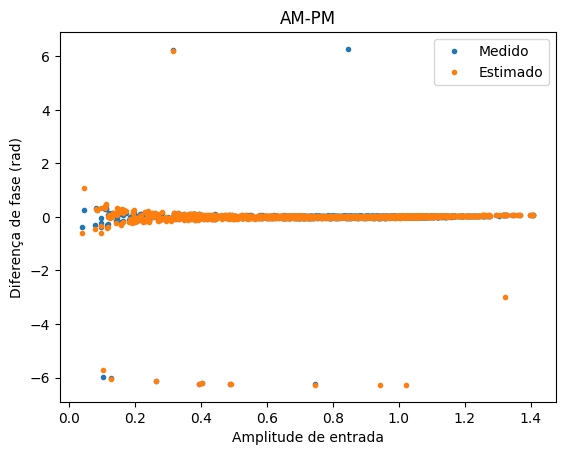

In [47]:
# Gráficos AM-AM e AM-PM
plt.figure()
plt.plot(np.abs(in_data_val[M:]), np.abs(out_data_val[M:]), '.', label='Medido')
plt.plot(np.abs(in_data_val[M:]), np.abs(predicted_val), '.', label='Estimado')
plt.xlabel('Amplitude de entrada')
plt.ylabel('Amplitude de saída')
plt.title('AM-AM')
plt.legend()

plt.figure()
plt.plot(np.abs(in_data_val[M:]), np.angle(out_data_val[M:])-np.angle(in_data_val[M:]), '.', label='Medido')
plt.plot(np.abs(in_data_val[M:]), np.angle(predicted_val)-np.angle(in_data_val[M:]), '.', label='Estimado')
plt.xlabel('Amplitude de entrada')
plt.ylabel('Diferença de fase (rad)')
plt.title('AM-PM')
plt.legend()